# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10 </span>
Luca Maria Colombo Gomez - Matr: 934049

### Exercise 1

I adapted the code from the previous exercise in order to solve the Trading Salesman Problem using a Simulated Annealing model.
I used a starting temperature of $1.5\,K$, that drops down to $0.001\,K$ in 1000 steps. A single path is generated randomly at the beginning, and 100 moves are performed consecutively on the path per each temperature step.

A move is a randomly chosen mutation from the Genetic Algorithm code, and is accepted with probability p, where p is derived from the Boltzmann distribution

$$ p= exp(-\beta(L_{new}^{(1)} - L_{old}^{(1)}))$$

The code is used to find the best path between 30 cities placed inside a square or on a circumference, the results are shown in the following plots

In [5]:
import matplotlib.pyplot as plt
import numpy as np

Minimum path on square is 4.68115
Minimum path on circumference is 6.23829


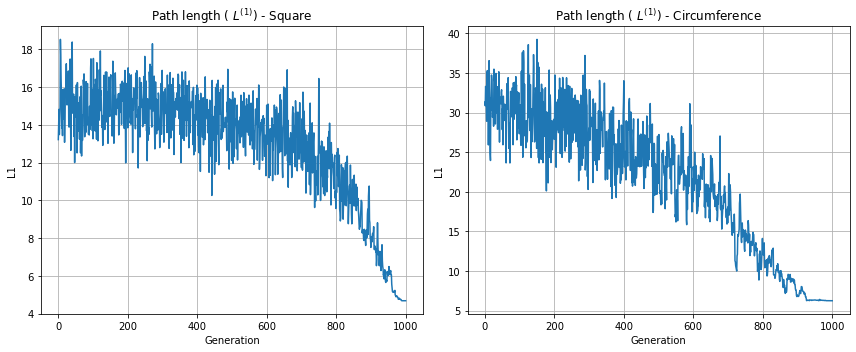

In [13]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (6*2, 5))
axes = axes.flatten()

# square
gen, l_best = np.loadtxt("10.1/data/square/distance.out", unpack = True)
axes[0].plot(gen, l_best)
axes[0].set_title("Path length ( $L^{(1)}$) - Square")
print("Minimum path on square is " + str(l_best[-1]))


# circumference
gen, l_best = np.loadtxt("10.1/data/circumference/distance.out", unpack = True)
axes[1].plot(gen, l_best)
axes[1].set_title("Path length ( $L^{(1)}$) - Circumference")
print("Minimum path on circumference is " + str(l_best[-1]) )



for ax in axes:
    ax.set_ylabel("L1")
    ax.set_xlabel("Generation")
    ax.grid(True)


fig.tight_layout()
plt.show()

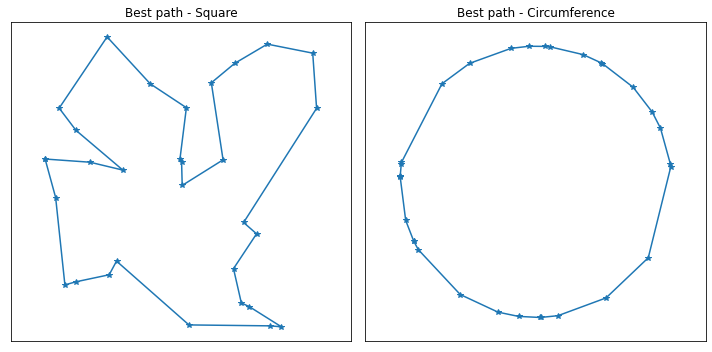

In [7]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (5*2, 5))
axes = axes.flatten()

# square
x_city, y_city = np.loadtxt("10.1/data/square/best_path.out", unpack = True, usecols = (1,2))
axes[0].plot(x_city, y_city,marker="*")
axes[0].set_title("Best path - Square")

# circumference
x_city, y_city = np.loadtxt("10.1/data/circumference/best_path.out", unpack = True, usecols = (1,2))
axes[1].plot(x_city, y_city,marker="*")
axes[1].set_title("Best path - Circumference")

for ax in axes:
    ax.axis('equal')
    ax.axes.get_xaxis().set_visible(False) 
    ax.axes.get_yaxis().set_visible(False)

fig.tight_layout()
plt.show()

### Exercise 2

I changed the previous code using MPI libraries, in order to parallelize the execution of multiple SA search and comprare the results at the end. In this way the time needed to find the solution for more complex problem can be greatly reduced.

I tried to run the code with 4 nodes, using the command ```mpirun -n 4 main.x```, the results are shown below per each node.

Minimum path on square is 4.57134 , found on node 1
Minimum path on circumference is 6.23829 , found on node 0


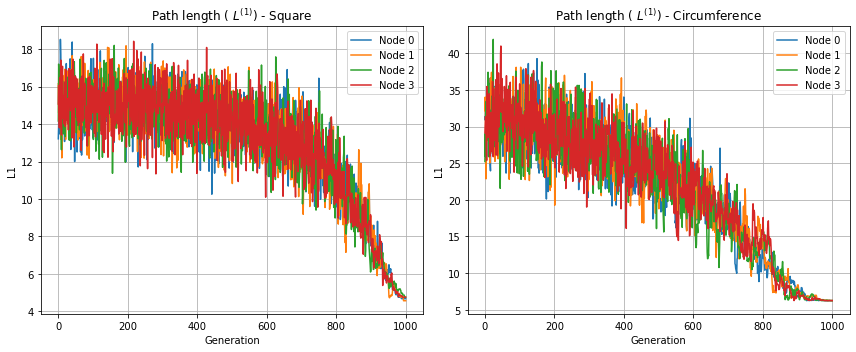

In [11]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (6*2, 5))
axes = axes.flatten()

min_square = 1
min_circ = 1

# square
for i in range(0,4):
    gen, l_best = np.loadtxt("10.2/data/square/distance_" + str(i) + ".out", unpack = True)
    axes[0].plot(gen, l_best,label = "Node " + str(i))
    if(i == 0 or l_best[-1] < min_square ):
        min_square = l_best[-1]
        node_square = i
    
axes[0].set_title("Path length ( $L^{(1)}$) - Square")

# circumference
for i in range(0,4):
    gen, l_best = np.loadtxt("10.2/data/circumference/distance_" + str(i) + ".out", unpack = True)
    axes[1].plot(gen, l_best,label = "Node " + str(i))
    if(i == 0 or l_best[-1] < min_circ ):
        min_circ = l_best[-1]
        node_circ = i
    
axes[1].set_title("Path length ( $L^{(1)}$) - Circumference")


for ax in axes:
    ax.set_ylabel("L1")
    ax.set_xlabel("Generation")
    ax.legend()
    ax.grid(True)

print("Minimum path on square is " + str(min_square) + " , found on node " + str(node_square))
print("Minimum path on circumference is " + str(min_circ) + " , found on node " + str(node_circ))

fig.tight_layout()
plt.show()

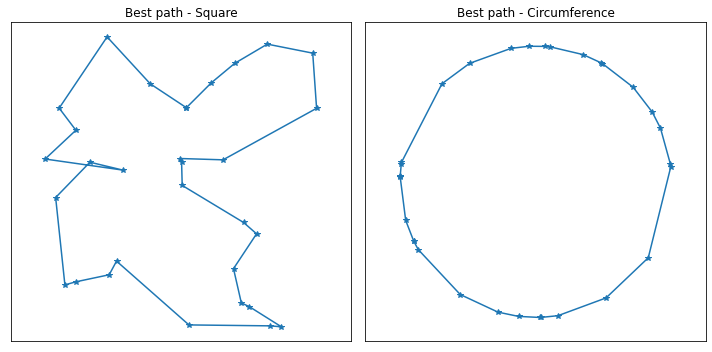

In [12]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (5*2, 5))
axes = axes.flatten()

# square
x_city, y_city = np.loadtxt("10.2/data/square/best_path_mpi.out", unpack = True, usecols = (1,2))
axes[0].plot(x_city, y_city,marker="*")
axes[0].set_title("Best path - Square")

# circumference
x_city, y_city = np.loadtxt("10.2/data/circumference/best_path_mpi.out", unpack = True, usecols = (1,2))
axes[1].plot(x_city, y_city,marker="*")
axes[1].set_title("Best path - Circumference")

for ax in axes:
    ax.axis('equal')
    ax.axes.get_xaxis().set_visible(False) 
    ax.axes.get_yaxis().set_visible(False)

fig.tight_layout()
plt.show()